# Plot using seaborn 
## 绘图的逻辑
1. 不同于Excel，用具体数值绘图；seaborn会对整体数据进行某种统计计算（count、mean、median...），然后映射到图上。  
    [举例barplot](#jump1)：  
    * estimator: 统计函数.  
    * ci:置信区间.  
   ps:不包括散点图
2. 用封装好的plot函数绘图，调参数


## 通用的 factorplot

1. 参数kind:呈现方式 {point, bar, count, box, violin, strip} 
2. 参数hue：图内分组变量 ；
3. 参数col：对比图分组变量


## 常用参数：
x,y,data: 传入数据，x,y轴的数据放置方向，也可用orient设置  
hue,col : 区分类别  
order, hue_order  
col,palette


## 各种小设置：  
|code|effect|
|---|----|
|sns.set_style("whitegrid")|plot style
|plt.figure(figsize=(4,4))| figure size
|plt.title('Survived or Died') /ax.|title
|plt.ylabel('Number of People')/ax.set_ylabel|label
|ax.set_ylim(0,ncount)| 坐标轴长度
|ax.set(ylabel = '',ylim = (0,1.0))|统一设置
|ax.yaxis.set_major_locator(ticker.LinearLocator(8)) |y轴分为7等份
|ax.yaxis.set_major_locator(ticker.MultipleLocator(10)) |y轴按10为间隔
|ax2=ax.twinx() |add 次坐标轴
|ax2.grid(None)| get rid of grid of ax2
|ax.annotate(value,x_loc,y_loc)|在指定位置添加文字
|plt.legend() = ax.legend(handles, labels)|--
|plt.show() |只展示图，无其他信息



[在柱状图上添加数据](#jump1);  
[修改每组的类别名x_ticks](#jump1);  
[添加新图例legend](#jump2);  
[融合2幅图](#jump2);  
[2个坐标轴](#jump2);


### Reference_Urls:    
[x_ticks](http://matplotlib.org/examples/ticks_and_spines/ticklabels_demo_rotation.html)    
[legend](http://matplotlib.org/users/legend_guide.html)  
[legend_guid](http://matplotlib.org/1.3.1/users/legend_guide.html)  
[matplotlib.lines](http://matplotlib.org/api/lines_api.html)  
   


<span id="jump1">
## Barplot </span>

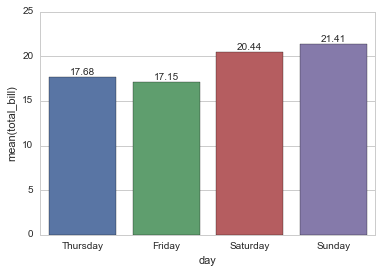

In [47]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips,ci=None)#,estimator=median,ci=95 ) #默认统计均值

#给柱状图添加数据标签
x_ticks =[] 
for p in ax.patches:  #遍历每一组
    x=p.get_bbox().get_points()[:,0] #bar的左右x坐标值
    y=p.get_bbox().get_points()[1,1] #bar的y值
    #在bar上方添加数据 
    ax.annotate('{:.2f}'.format(y), (x.mean(), y), ha='center', va='bottom') 
    x_ticks.append(x.mean()) #获取每组类别名的x_loc
#修改 每组的类别名x_tick
plt.xticks(x_ticks,['Thursday','Friday','Saturday','Sunday']) # add x_ticks (location,ticks)
plt.show()

<span id ='2'>
## Melt 2 plots; Create new legend; Add second y-axis
</span>

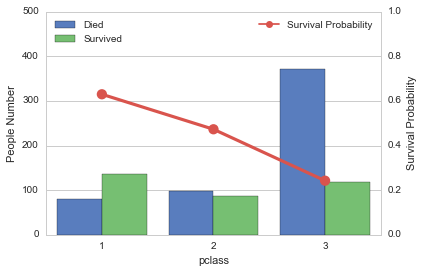

In [55]:
#融合2幅图，不要使用factorplot，利用2个cx对象

import matplotlib.ticker as ticker

titanic = sns.load_dataset("titanic")
cx = sns.countplot(x="pclass", hue="survived",data=titanic,palette="muted")
cx.set(ylabel = 'People Number',ylim = (0,500))
plt.legend(('Died', 'Survived'),loc =2)
cx.yaxis.set_major_locator(ticker.LinearLocator(6))

#创建第二个坐标轴 注意调整刻度
cx2 = cx.twinx()
cx2 = sns.pointplot(x="pclass", y="survived",join=True, data=titanic,color = sns.xkcd_rgb["pale red"],ci = None)
cx2.set( ylabel="Survival Probability")
cx2.set_ylim(0,1)
cx2.yaxis.set_major_locator(ticker.MultipleLocator(0.2))

#只有一个类别时，不会自动带上图例，可以手动添加
#创建一个line对象，并使用它的图例
fakeLine1 = plt.Line2D([0,0],[0,1], color=sns.xkcd_rgb["pale red"], marker='o', linestyle='-')
cx2.legend([fakeLine1], ["Survival Probability"])
cx2.grid(False)
plt.show()
